# Основы анализа данных в Python

*Алла Тамбовцева*

## Практикум 6. Доверительный интервал для среднего нормальной выборки

Импортируем необходимые библиотеки и модули:

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

## Часть 1: вспоминаем нормальное распределение и распределение Стьюдента

*Код в этой части практикума не является обязательным для запоминания и досконального изучения, мы будем использовать его для вычисления вероятностей и изображения графиков плотности нормальных распределений с разными параметрами. Однако, методы для нахождения квантилей разных распределений могут пригодиться для построения доверительных интервалов.*

Допустим, нас интересует нормальное распределение со средним 10 и дисперсией 25, то есть $N(a=10, \sigma^2=25)$. В Python (и в других языках обычно тоже) для создания нормальных случайных величин и выборок из них в качестве второго параметра используется стандартное отклонение $\sigma$, а не дисперсия $\sigma^2$. Сохраним параметры распределения в переменные:

In [2]:
a = 10
sigma = 5

Воспользумся функцией `norm()` из модуля `stats` и создадим случайную величину `X`:

In [3]:
X = stats.norm(loc = a, scale = sigma)
print(X) # не массив, особый объект

Мы знаем, что плотность распределения нормальной случайной величины похожа на симметричный колокол. Как построить график плотности распределния в Python? 

Python строит графики исключительно по точкам, поэтому сначала нам нужно получить массив из достаточно большого числа значений случайной величины. В каждом значении мы вычислим плотность нормального распределения, а затем нанесём на график полученные результаты и соединим их линией.

**Вопрос 1.** Почему нам требуется достаточно много точек?

> По малому числу точек не получим гладкую кривую для графика, получится ломаная линия.

**Вопрос 2.** В каком интервале находятся 99.8% значений нормальной случайной величины с заданными параметрами? Вычислите левую и правую границу такого интервала и сохраните их в переменные `left` и `right`.

> По правилу трех сигм отклоняемся на три стандартных отклонения от среднего в обе стороны.

In [4]:
left = a - 3 * sigma
right = a + 3 * sigma
print(left, right)

-5 25


Отлично, теперь мы сможем создать массив значений от `left` до `right`, состоящий, например, из 100 точек, равноудаленных друг от друга:

In [5]:
# функция linspace() от linear space
x_ = np.linspace(left, right, num = 100)
print(x_)

[-5.         -4.6969697  -4.39393939 -4.09090909 -3.78787879 -3.48484848
 -3.18181818 -2.87878788 -2.57575758 -2.27272727 -1.96969697 -1.66666667
 -1.36363636 -1.06060606 -0.75757576 -0.45454545 -0.15151515  0.15151515
  0.45454545  0.75757576  1.06060606  1.36363636  1.66666667  1.96969697
  2.27272727  2.57575758  2.87878788  3.18181818  3.48484848  3.78787879
  4.09090909  4.39393939  4.6969697   5.          5.3030303   5.60606061
  5.90909091  6.21212121  6.51515152  6.81818182  7.12121212  7.42424242
  7.72727273  8.03030303  8.33333333  8.63636364  8.93939394  9.24242424
  9.54545455  9.84848485 10.15151515 10.45454545 10.75757576 11.06060606
 11.36363636 11.66666667 11.96969697 12.27272727 12.57575758 12.87878788
 13.18181818 13.48484848 13.78787879 14.09090909 14.39393939 14.6969697
 15.         15.3030303  15.60606061 15.90909091 16.21212121 16.51515152
 16.81818182 17.12121212 17.42424242 17.72727273 18.03030303 18.33333333
 18.63636364 18.93939394 19.24242424 19.54545455 19.

И в каждой точке вычислить значение плотности, применив метод `.pdf()`, от *probability density function*:

In [6]:
print(X.pdf(x_))

[0.00088637 0.00106116 0.00126576 0.00150427 0.00178116 0.0021013
 0.00246989 0.00289248 0.00337497 0.00392349 0.00454445 0.00524438
 0.00602992 0.00690771 0.00788427 0.0089659  0.01015853 0.0114676
 0.0128979  0.01445341 0.01613714 0.01795095 0.01989543 0.02196968
 0.02417125 0.02649593 0.02893771 0.03148864 0.03413881 0.03687633
 0.03968732 0.04255599 0.0454647  0.04839414 0.05132348 0.05423057
 0.05709223 0.05988454 0.06258311 0.0651635  0.06760152 0.06987363
 0.07195731 0.07383144 0.07547665 0.07687562 0.07801344 0.07887785
 0.07945943 0.07975183 0.07975183 0.07945943 0.07887785 0.07801344
 0.07687562 0.07547665 0.07383144 0.07195731 0.06987363 0.06760152
 0.0651635  0.06258311 0.05988454 0.05709223 0.05423057 0.05132348
 0.04839414 0.0454647  0.04255599 0.03968732 0.03687633 0.03413881
 0.03148864 0.02893771 0.02649593 0.02417125 0.02196968 0.01989543
 0.01795095 0.01613714 0.01445341 0.0128979  0.0114676  0.01015853
 0.0089659  0.00788427 0.00690771 0.00602992 0.00524438 0.004544

Нанесем точки на график:

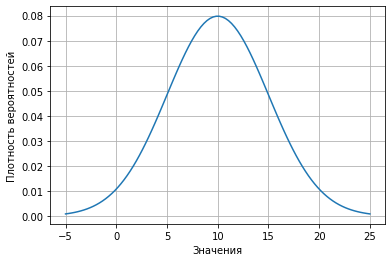

In [7]:
x_ = np.linspace(left, right, num = 100)

# в plot(): значения по оси X, значения по оси Y
# добавляем сетку grid
# и подписи к осям

plt.plot(x_, X.pdf(x_));
plt.grid();
plt.xlabel("Значения");
plt.ylabel("Плотность вероятностей");

Можем вычислить значения плотности в отдельных точках:

In [8]:
print(X.pdf(10))
print(X.pdf(20))

0.07978845608028654
0.010798193302637612


**Вопрос.** Что означают полученные значения?

> Вероятность попасть в окрестность значения 10 и 20 соответственно. Величина $X$ – непрерывная, она может принимать бесконечное число значений, поэтому вероятность попадания ровно в точку 10 равна 0. Однако оценить вероятность попадания в небольшую окрестность вокруг значения можно – это и показывает функция плотности. Чем выше значение плотности, тем более вероятным является значение.

Также мы можем вычислить вероятность попадания в тот или иной интервал. На объектах типа *случайная величина* есть метод `.cdf()`, от *cumulative density function*, который считает вероятность, «накопленную» к определенному моменту. Вычислим вероятности $P(X < 10) = P(X \leqslant 10)$ и $P(X < 20) = P(X \leqslant 20)$:

In [9]:
print(X.cdf(10))
print(X.cdf(20))

0.5
0.9772498680518208


**Вопрос.** Как теперь вычислить вероятность $P(10 < X < 20)$?

In [10]:
print(X.cdf(20) - X.cdf(10))

0.4772498680518208


Давайте визуализируем эту вероятность – закрасим соответствующую площадь под графиком плотности!

In [11]:
# по аналогии с примером выше получаем набор точек от 10 до 20
# вычисляем в каждой точке плотность
# это будут границы закрашенной области

interval = np.linspace(10, 20, num = 100)
density = X.pdf(interval)

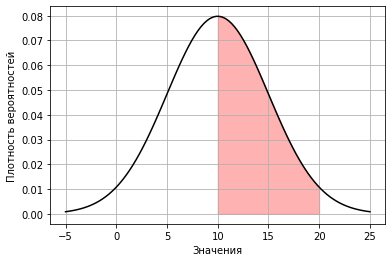

In [12]:
# прошлый код + черный цвет линии

plt.plot(x_, X.pdf(x_), color = "black");
plt.grid();
plt.xlabel("Значения");
plt.ylabel("Плотность вероятностей");

# закрашиваем область, 
# ограничитель по x – interval, по y – density, 
# далее цвет и прозрачность

plt.fill_between(interval, density, color = "red", alpha = 0.3);

### Задача 1

Создайте стандартную нормальную величину `Z` и постройте график плотности ее распределения.

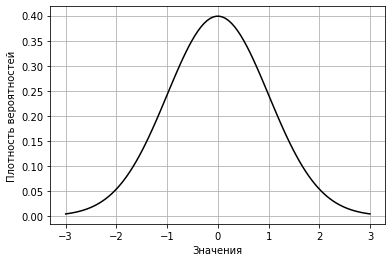

In [13]:
Z = stats.norm(loc = 0, scale = 1) # или просто norm()
z_ = np.linspace(-3, 3, num = 100)

plt.plot(z_, Z.pdf(z_), color = "black");
plt.grid();
plt.xlabel("Значения");
plt.ylabel("Плотность вероятностей");

### Задача 2

На объектах типа *случайная величина* есть метод `.ppf()` от *percent point function*, функция процентных точек, которая находит точку, слева от которой находится $p \cdot 100$% значений случайной величины. Другими словами, этот метод позволяет вычислять квантили.

Вычислите для стандартной нормальной величины `Z`:

* медиану;
* квантиль уровня 0.9;
* квантиль уровня 0.1.

In [14]:
print(Z.ppf(0.5))
print(Z.ppf(0.9))
print(Z.ppf(0.1))

0.0
1.2815515655446004
-1.2815515655446004


Ниже приведен код для иллюстрации полученных результатов – графиков с закрашенной площадью.

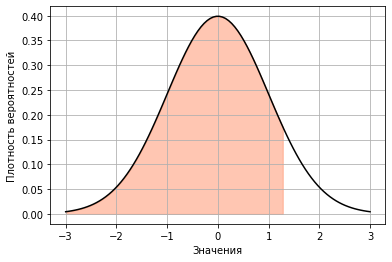

In [15]:
plt.plot(z_, Z.pdf(z_), color = "black");
plt.grid();
plt.xlabel("Значения");
plt.ylabel("Плотность вероятностей");
plt.fill_between(np.linspace(-3, 1.28, num = 100), 
                  Z.pdf(np.linspace(-3, 1.28, num = 100)), 
                 color = "orangered", alpha = 0.3);

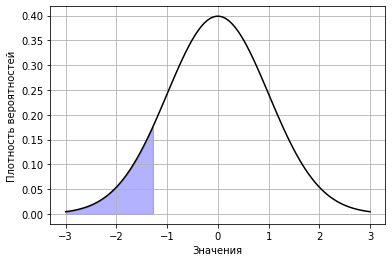

In [16]:
plt.plot(z_, Z.pdf(z_), color = "black");
plt.grid();
plt.xlabel("Значения");
plt.ylabel("Плотность вероятностей");
plt.fill_between(np.linspace(-3, -1.28, num = 100), 
                  Z.pdf(np.linspace(-3, -1.28, num = 100)), 
                 color = "blue", alpha = 0.3);

### Задача 3

Ниже приведен код, который строит график плотности стандартного нормального распределения, и закрашивает на нем площадь равную 0.95 на отрезке, симметричном относительно 0:

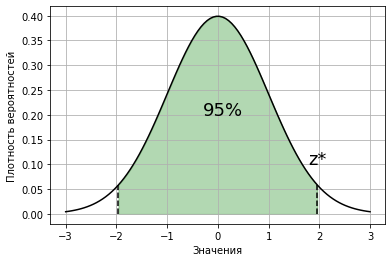

In [17]:
plt.plot(z_, Z.pdf(z_), color = "black");
plt.grid();
plt.xlabel("Значения");
plt.ylabel("Плотность вероятностей");

plt.fill_between(np.linspace(-1.96, 1.96, num = 100), 
                 Z.pdf(np.linspace(-1.96, 1.96, num = 100)), 
                 color = "green", alpha = 0.3);

# вертикальные линии в x = -1.96 и 1.96
# по y ограничены значением плотности в 1.96
# тип линии – пунктир

plt.vlines(x = [-1.96, 1.96], 
           ymin = 0, 
           ymax = Z.pdf(1.96), 
           color = "black", 
           linestyle = "--");

# добавляем строку с текстом s
# координаты строки в x и y
# размер шрифта 18
# выравнивание по центру (относительно точки x,y)

plt.text(s = "95%", 
         x = 0.1, 
         y = 0.2, 
         fontsize = 18,
         horizontalalignment = "center");

# дополнительно добавляем подпись z*
# для наглядности

plt.text(s = "z*", 
         x = 1.96, 
         y = 0.1, 
         fontsize = 18,
         horizontalalignment = "center");

Квантиль какого уровня нужно вычислить, чтобы найти $z^*$?

In [18]:
# уровня 0.975
# 0.95 + площадь хвоста слева

print(Z.ppf(0.975))

1.959963984540054


### Задача 4

Создадим случайную величину, имеющую распределение Стьюдента с 4 степенями свободы и построим в одних осях график ее плотности и плотности стандартной нормальной случайной величины:

In [19]:
T = stats.t(df = 4)

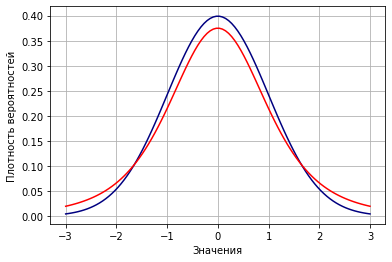

In [20]:
# просто два раза plot()
# по оси X одни и те же значения z_
# по оси Y – для каждого графика своя плотность

plt.plot(z_, Z.pdf(z_), color = "navy");
plt.plot(z_, T.pdf(z_), color = "red");

plt.grid();
plt.xlabel("Значения");
plt.ylabel("Плотность вероятностей");

Прокомментируйте различия. Вычислите для величины `T` квантиль того же уровня, что и в предыдущей задаче. Сравните результаты. 

In [21]:
# квантиль больше

print(T.ppf(0.975))

2.7764451051977987


> Плотности похожи, но у плотности распределения Стьюдента более тяжелые (толстые) хвосты. Другими словами, вероятность встретить значения, более удаленные от 0, выше, чем в случае стандартного нормального распределения. Если изменим в `stats.t()` число степеней свободы с 4 на 40 и снова построим графики, заметим, что плотности практически не отличимы друг от друга. При увеличении числа степеней свободы распределение Стьюдента все больше и больше походит на стандартное нормальное (при df $\geqslant$ 30 различия становятся несущественными).

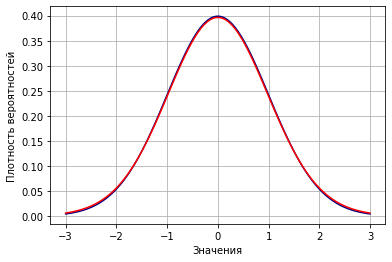

In [22]:
T = stats.t(df = 40)

plt.plot(z_, Z.pdf(z_), color = "navy");
plt.plot(z_, T.pdf(z_), color = "red");

plt.grid();
plt.xlabel("Значения");
plt.ylabel("Плотность вероятностей");

**Дополнительно.** Доказать сходство распределений при увеличении числа степеней свободы не очень просто, но сравнить математические ожидания и дисперсии можно. Математические ожидания у распределения Стьюдента с любым числом степеней свободы и стандартного нормального распределения совпадают и равны 0. А что с дисперсией? У стандартного нормального распределения она равна 1. У распределения Стьюдента:

$$D(T) = \frac{\text{df}}{\text{df}-2}$$

Получается, дисперсия распределения Стьюдента всегда больше 1 (числитель чуть больше знаменателя), но при этом, когда $\text{df}$ увеличивается, дисперсия становится ближе к 1, то есть ближе к дисперсии стандартного нормального распределения:  

In [26]:
for i in range(3, 41):
    print(f"df = {i}, D(T) = {i / (i - 2)}")

df = 3, D(T) = 3.0
df = 4, D(T) = 2.0
df = 5, D(T) = 1.6666666666666667
df = 6, D(T) = 1.5
df = 7, D(T) = 1.4
df = 8, D(T) = 1.3333333333333333
df = 9, D(T) = 1.2857142857142858
df = 10, D(T) = 1.25
df = 11, D(T) = 1.2222222222222223
df = 12, D(T) = 1.2
df = 13, D(T) = 1.1818181818181819
df = 14, D(T) = 1.1666666666666667
df = 15, D(T) = 1.1538461538461537
df = 16, D(T) = 1.1428571428571428
df = 17, D(T) = 1.1333333333333333
df = 18, D(T) = 1.125
df = 19, D(T) = 1.1176470588235294
df = 20, D(T) = 1.1111111111111112
df = 21, D(T) = 1.105263157894737
df = 22, D(T) = 1.1
df = 23, D(T) = 1.0952380952380953
df = 24, D(T) = 1.0909090909090908
df = 25, D(T) = 1.0869565217391304
df = 26, D(T) = 1.0833333333333333
df = 27, D(T) = 1.08
df = 28, D(T) = 1.0769230769230769
df = 29, D(T) = 1.0740740740740742
df = 30, D(T) = 1.0714285714285714
df = 31, D(T) = 1.0689655172413792
df = 32, D(T) = 1.0666666666666667
df = 33, D(T) = 1.064516129032258
df = 34, D(T) = 1.0625
df = 35, D(T) = 1.06060606060606

## Часть 2: доверительный интервал для среднего нормальной выборки

### Задача 1 (из демоверсии НЭ)

Винни-Пух в течение 150 дней фиксировал изменения количества пчёл в улье. Он уверен, что полученные наблюдения являются выборкой независимых одинаково распределённых нормальных случайных величин. Оказалось, что среднее количество пчёл равно 25000, а выборочная дисперсия равна 1300. Постройте 95%-ый доверительный интервал для математического ожидания количества пчёл в улье и выпишите в ответ его нижнюю границу, округлённую до целого.

Пример ответа: 1500

In [28]:
n = 150
avg = 25000
s2 = 1300

# считаем ст отклонение s
# извлекаем корень = возводим в степень 0.5

s = s2 ** 0.5

# считаем ст ошибку среднего

se = s / n ** 0.5

In [30]:
# строим границы ДИ

stats.norm.interval(0.95, loc = avg, scale = se)

(24994.230022260643, 25005.769977739357)

ОТВЕТ: 24994

### Задача 2

*Выборка взята из другой задачи демоверсии НЭ, задача переделана.*

Ниже приведены данные об уровне осадков в некотором регионе России:

[103.01, 101.99, 105.21, 106.80, 112.70, 106.13, 110.48, 109.26, 100.44, 100.28].

Предполагая, что наблюдения являются выборкой независимых одинаково распределённых нормальных случайных величин, постройте 90%-ый доверительный интервал для математического ожидания уровня осадков в этом регионе.

In [31]:
# для удобства сохраняем в массив

data = np.array([103.01, 101.99, 105.21, 106.80, 112.70, 
        106.13, 110.48, 109.26, 100.44, 100.28])

In [33]:
# так как выборка маленькая, используем t-распределение
# t.interval() вместо norm.interval()

stats.t.interval(0.9, loc = data.mean(), 
                 scale = stats.sem(data), 
                 df = data.size - 1)

(103.15433817146561, 108.10566182853438)

Пояснения к коду:
    
* считаем среднее по массиву через метод `.mean()`;
* функция `sem()` из `stats` считает стандартную ошибку среднего по выборке (массиву/списку/столбцу датафрейма);
* в `df` выставляем число степеней свободы – на 1 меньше, чем число наблюдений в выборке.

**NB.** Функция `sem()` не работает, если в массиве/столбце с данными есть пропуски.